In [1]:
import pandas as pd
#!pip install seaborn==0.12.0
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install numpy==1.23.2
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


Exibindo a tabela inicial.

In [3]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
translate = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia',
    'time' : 'hora',
    'size' : 'pessoas'
}

In [5]:
gorjetas = df.rename(columns = translate)

Renomeando as colunas do DataFrame df usando um dicionário o "translate" e renomeando a tabela.

In [6]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


Exibindo como ficou a tabela após a tradução.

In [7]:
df.dtypes

total_bill    float64
tip           float64
dessert        object
day            object
time           object
size            int64
dtype: object

Verificando os tipos de dados de cada coluna.

In [8]:
gorjetas.isnull().sum()

valor_da_conta    0
gorjeta           0
sobremesa         0
dia               0
hora              0
pessoas           0
dtype: int64

Verificando que não há nenhum valor nulo que possa interferir na análise.

In [9]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [10]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


Adicionando uma coluna de porcentagem na tabela gorjetas e exibindo como ficou as cinco primeiras linhas.

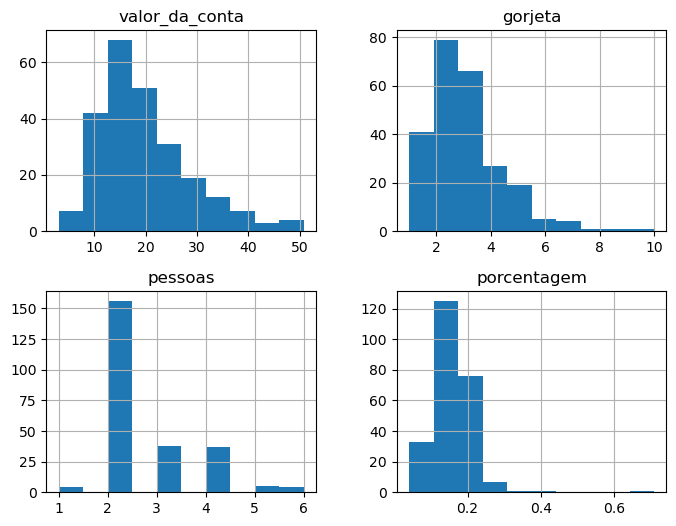

In [11]:
gorjetas.hist(figsize=(8, 6));

Um histograma para cada coluna numérica no DataFrame gorjetas, mostrando a intensidade dos valores em cada coluna.

Text(0.5, 0.98, 'Valor da conta x Valor da gorjeta')

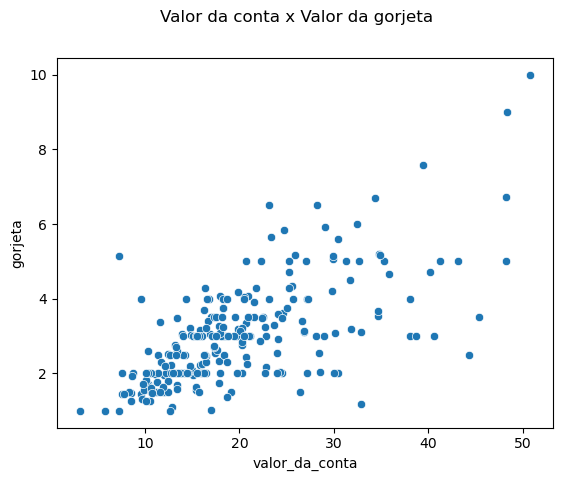

In [12]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta.figure.suptitle('Valor da conta x Valor da gorjeta')

Analisando a relação entre o valor da conta e o valor da gorjeta para os dados contidos no DataFrame.

<Axes: title={'center': 'Análise do valor da gorjeta em função do valor da conta'}, xlabel='valor_da_conta', ylabel='porcentagem'>

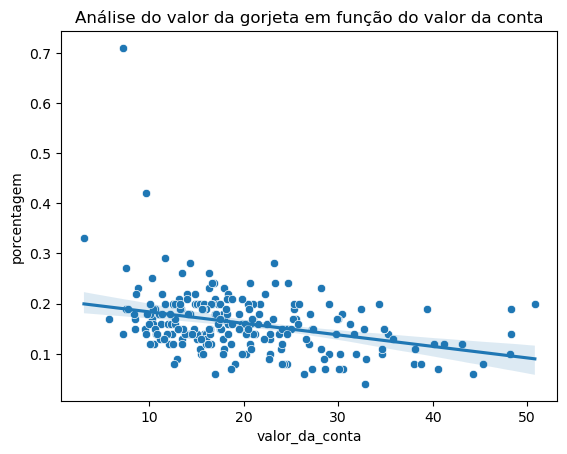

In [13]:
valor_porcentagem = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
valor_porcentagem.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_porcentagem.set(xlabel='Valor da Conta', ylabel='Porcentagem')

sns.regplot(x='valor_da_conta', y='porcentagem', data=gorjetas, scatter=False, ax=valor_porcentagem)

O valor da conta não é proporcional ao valor da gorjeta visualizando pela porcentagem.

In [14]:
gorjetas[gorjetas.sobremesa == 'Yes']

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
56,38.01,3.00,Yes,Sat,Dinner,4,0.08
58,11.24,1.76,Yes,Sat,Dinner,2,0.16
60,20.29,3.21,Yes,Sat,Dinner,2,0.16
61,13.81,2.00,Yes,Sat,Dinner,2,0.14
62,11.02,1.98,Yes,Sat,Dinner,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Yes,Sat,Dinner,2,0.19
236,12.60,1.00,Yes,Sat,Dinner,2,0.08
237,32.83,1.17,Yes,Sat,Dinner,2,0.04
240,27.18,2.00,Yes,Sat,Dinner,2,0.07


Filtrando apenas as colunas que foram pedido sobremesa para analisar se a sobremesa interfere na gorjeta.

In [15]:
gorjetas[gorjetas.sobremesa == 'Yes'].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


Dos 244 registros que nós temos, 93 pessoas pediram sobremesa; Dessas 93 pessoas, a média de valor da conta foi de 20; Dessas 93 pessoas, a média de valor da gorjeta foi de 3.

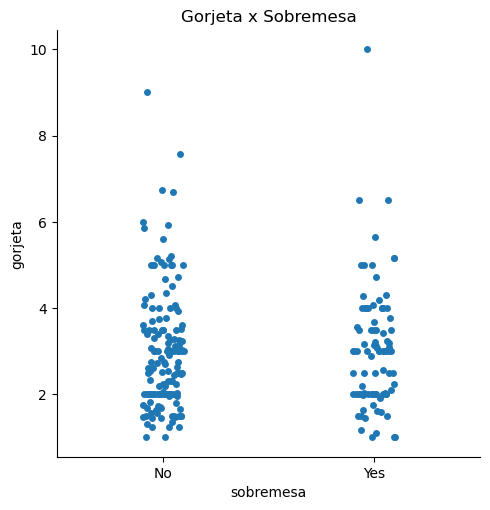

In [16]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)
plt.title('Gorjeta x Sobremesa')
plt.show()

Visualizando se há diferenças nas gorjetas com base em se os clientes pediram ou não sobremesa.

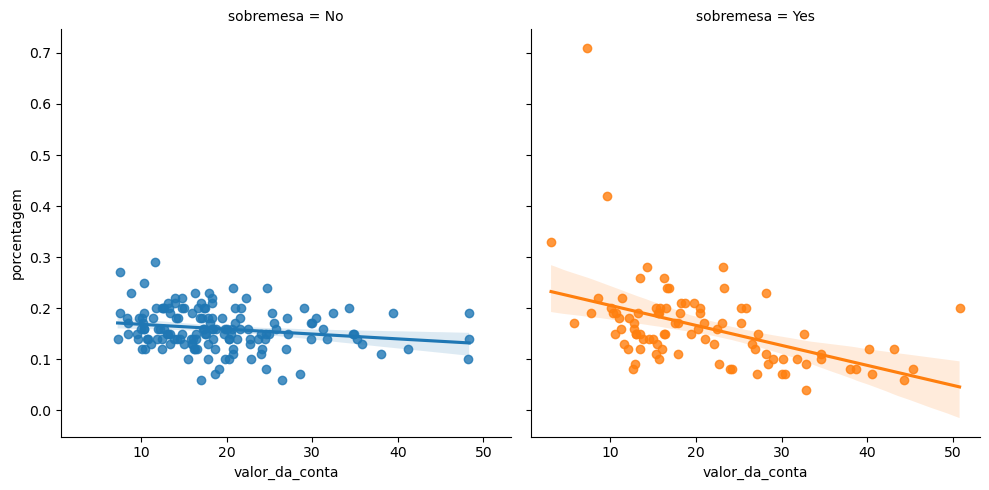

In [17]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

Gráfico de dispersão com uma linha de regressão linear para cada categoria de sobremesa (com sobremesa ou sem sobremesa). Analisando a diferença no valor das contas das mesas que pegaram sobremesa ou não.

In [18]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

Os dias da semana usados como referencia para gorjeta.

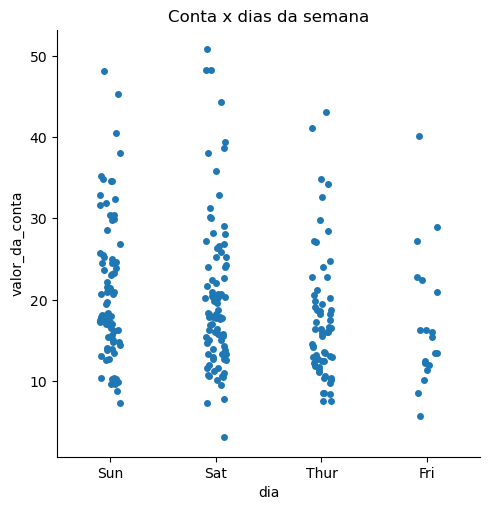

In [19]:
sns.catplot(x = 'dia', y = 'valor_da_conta', data = gorjetas)
plt.title('Conta x dias da semana')
plt.show()

Valor da conta conforme dia da semana. Sábado se tem os maiores valores de contas fechadas na mesa, de sexta-feira os valores mais baixos de contas fechadas e o menor fluxo de mesas com pessoas tambem.

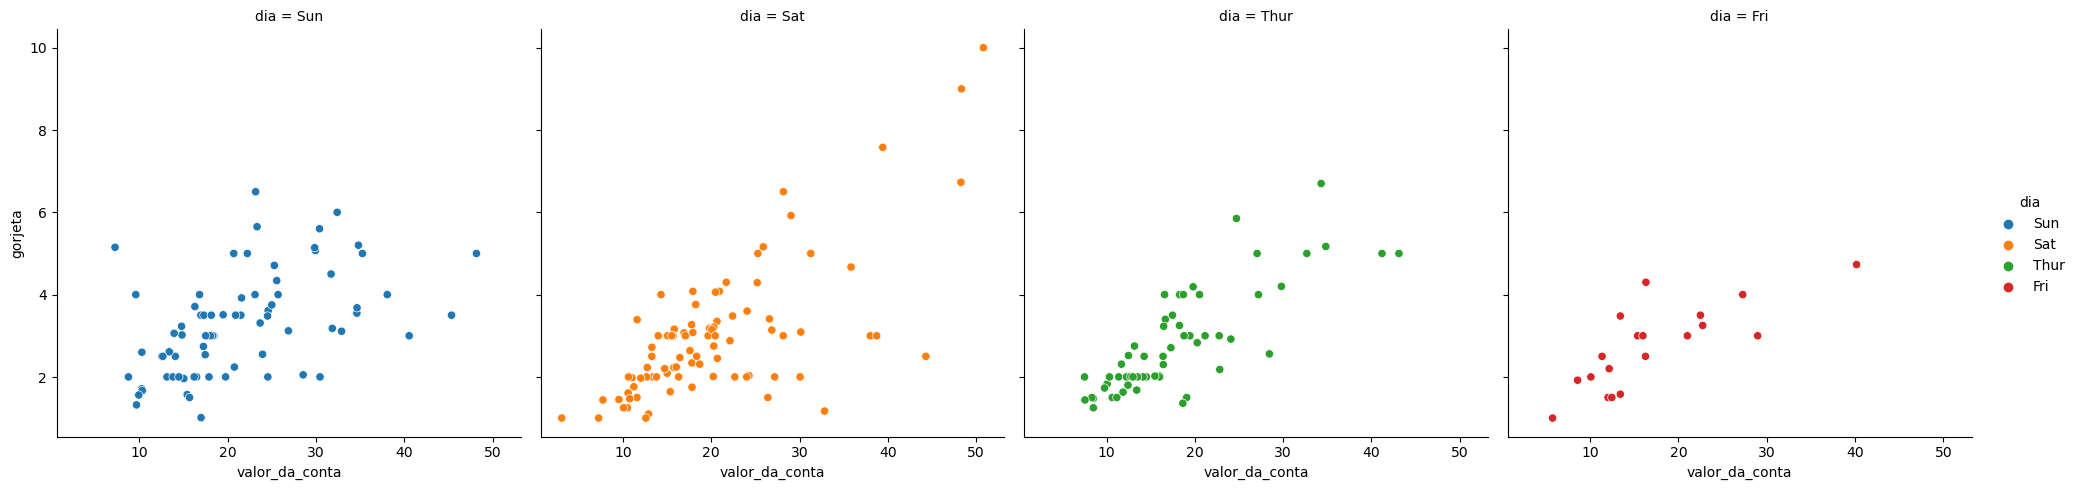

In [20]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

Valor da conta e da gorjeta relacionados aos dias da semana em gráficos separados. Sábado há as maiores gorjetas.

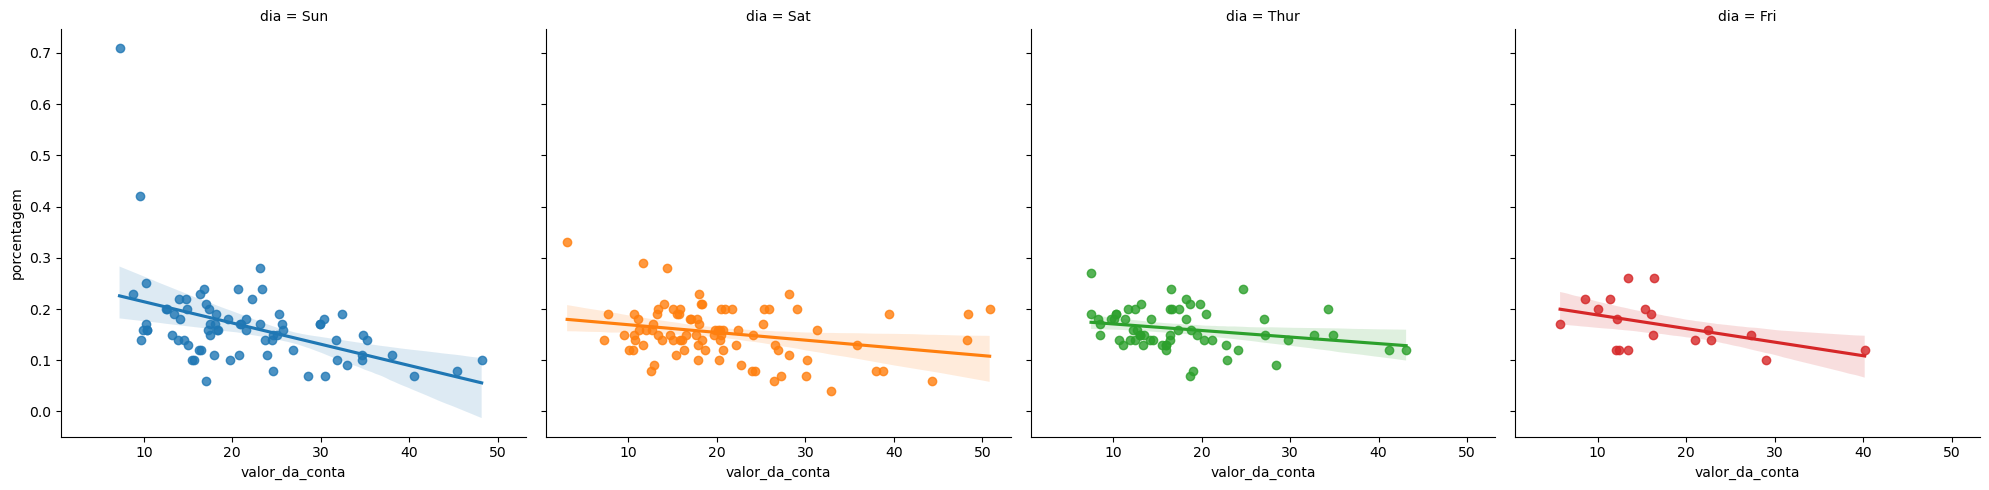

In [21]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

Gráficos de dispersão, um para cada dia da semana, com linhas de regressão mostrando a tendência geral entre o valor da conta e a porcentagem da gorjeta, permitindo também visualizar como essa relação varia em diferentes dias da semana.

In [22]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

Identificando as arrays existentes nessa categoria para fazer uma análise com ela (Jantar ou almoço).

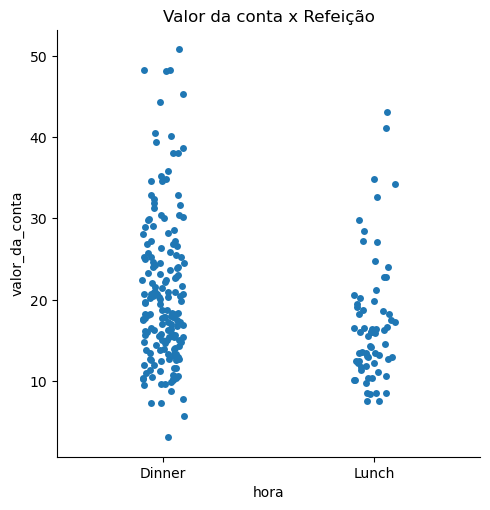

In [23]:
sns.catplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)
plt.title('Valor da conta x Refeição')
plt.show()

Analisando o valor da conta conforme a hora (tipo de refeição). No jantar há um fluxo maior de pessoas e valores maiores no fechamento de contas.

<Axes: xlabel='hora', ylabel='valor_da_conta'>

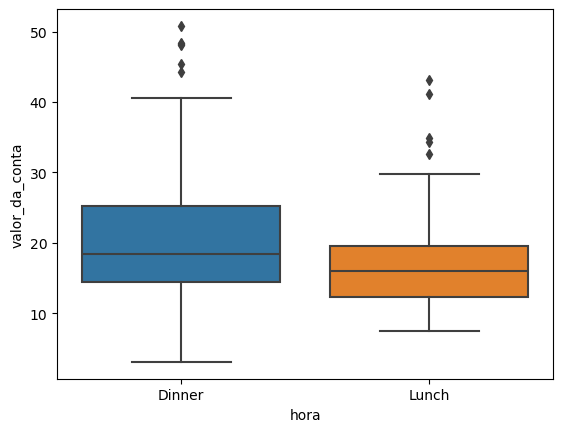

In [24]:
sns.boxplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

Boxplot para mostrar os dados anteriores agrupados para melhor visualização.

In [25]:
hora_almoco = gorjetas.query("hora == 'Lunch'").valor_da_conta

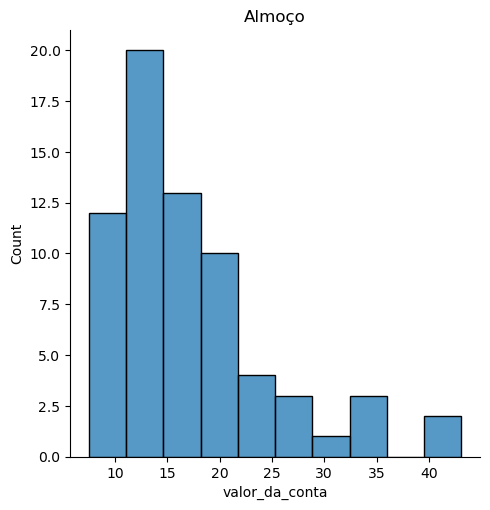

In [26]:
sns.displot(hora_almoco)
plt.title('Almoço')
plt.show()

Histograma mostrando os valores da conta e sua densidade ou frequência. No almoço valores de contas de maior frequência são baixas.

In [27]:
hora_jantar = gorjetas.query("hora == 'Dinner'").valor_da_conta

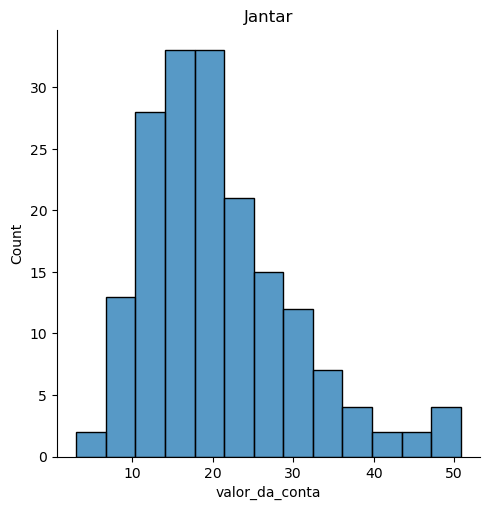

In [28]:
sns.displot(hora_jantar)
plt.title('Jantar')
plt.show()

Histograma mostrando os valores da conta e sua densidade ou frequência no jantar.

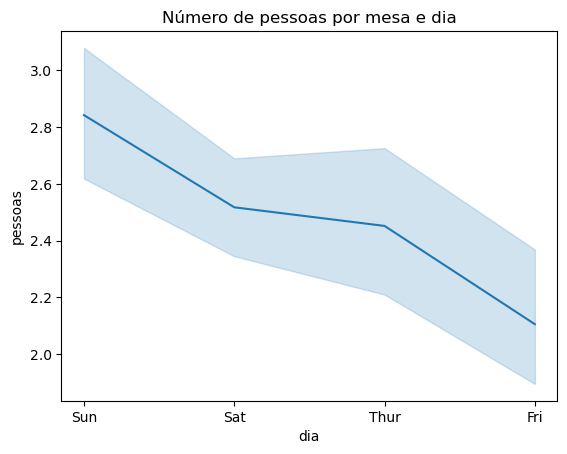

In [29]:
sns.lineplot(x='dia', y='pessoas', data=gorjetas)
plt.title('Número de pessoas por mesa e dia')
plt.show()


Relação entre o número de pessoas por mesa de acordo com o dia da semana. O dia com maior número de pessoas por mesa é domingo.

In [30]:
total_mesas_com_gorjeta_por_dia = gorjetas.groupby('dia')['pessoas'].nunique()
print(total_mesas_com_gorjeta_por_dia)


dia
Fri     4
Sat     5
Sun     5
Thur    6
Name: pessoas, dtype: int64


Exibindo a quantidade de mesas que pagaram gorjetas por dia da semana. O hábito de dar gorjeta pode ser mais comum em alguns dias do que em outros.

In [31]:
total_gorjetas_por_dia = gorjetas.groupby('dia')['pessoas'].sum()
print(total_gorjetas_por_dia)

dia
Fri      40
Sat     219
Sun     216
Thur    152
Name: pessoas, dtype: int64


Cada valor no resultado representa a soma de todas as gorjetas dadas em um determinado dia. Os valores totais de gorjeta variam entre os dias da semana. Isso pode indicar padrões de consumo diferentes ou níveis de satisfação do cliente variáveis ao longo da semana.

In [32]:
media_porcentagem_gorjeta = gorjetas.groupby('dia')['porcentagem'].mean()
print('Média da porcentagem da gorjeta por dia da semana:')
print(media_porcentagem_gorjeta)

Média da porcentagem da gorjeta por dia da semana:
dia
Fri     0.169474
Sat     0.153678
Sun     0.166974
Thur    0.161129
Name: porcentagem, dtype: float64


A tendência média de quanto as pessoas costumam dar de gorjeta em relação ao valor total da conta em cada dia da semana.
Isso mostra que o domingo tem a média maior de gorjetas.

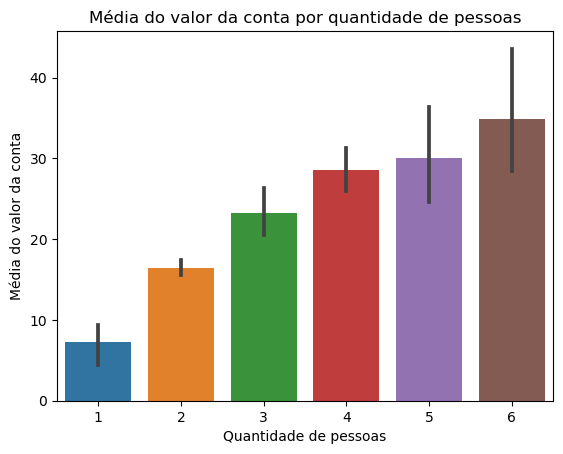

In [33]:
sns.barplot(x='pessoas', y='valor_da_conta', data=gorjetas)
plt.title('Média do valor da conta por quantidade de pessoas')
plt.xlabel('Quantidade de pessoas')
plt.ylabel('Média do valor da conta')
plt.show()

As mesas com maiores números de pessoas são as com valores mais altos de conta.

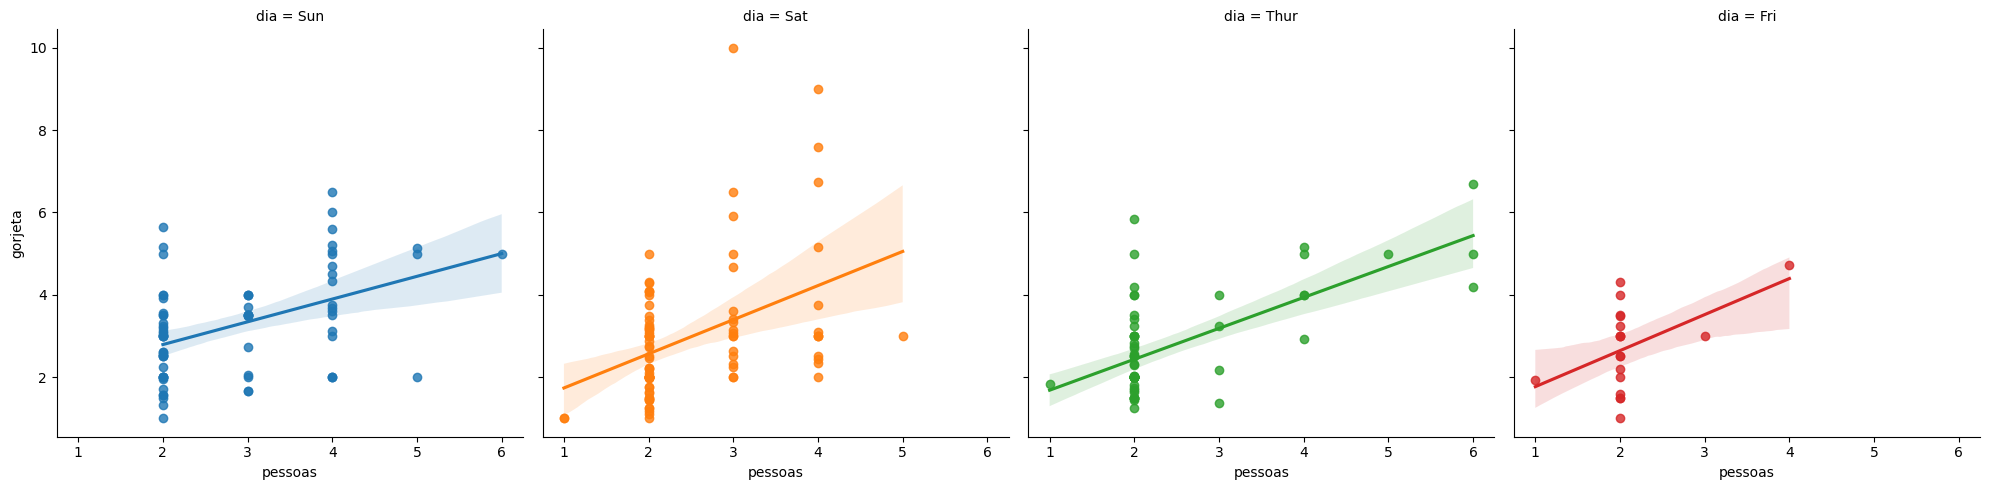

In [34]:
sns.lmplot(x = 'pessoas', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

Múltiplos gráficos de dispersão, cada um representando a relação entre o número de pessoas na mesa e o valor da gorjeta para um dia específico da semana, com linhas de regressão mostrando a tendência geral. No gráfico mostra que as mesas com maior número de pessoas não são as que dão maior gorjetas mesmo mostrando no gráfico anterior que o valor da conta das mesas com maiores pessoas são maiores.